In [110]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2023-01-01'
end_date = '2023-07-12'

# Set the ticker
ticker = 'AAPL'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.071976,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.551331,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.422852,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.355652,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,187.826370,46638100


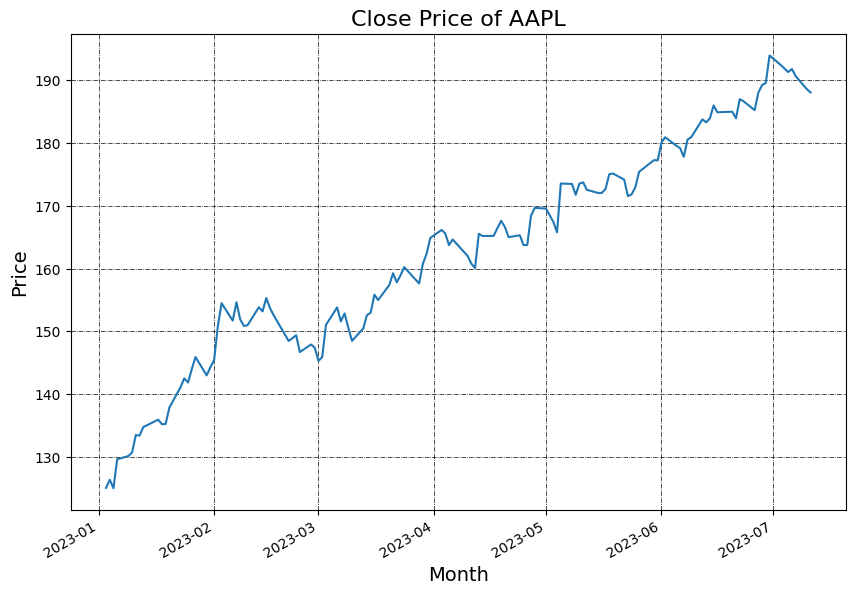

In [111]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the close price
data['Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Month', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [112]:
# First-order differencing
data['Close_diff'] = data['Close'].diff()

In [113]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -6.908594615947967
p-value: 1.2288935054254991e-09
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}


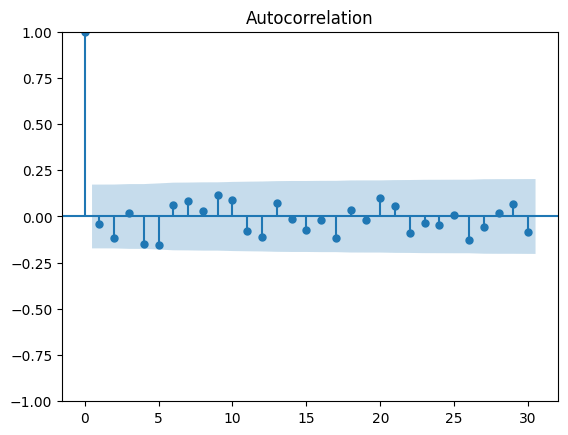

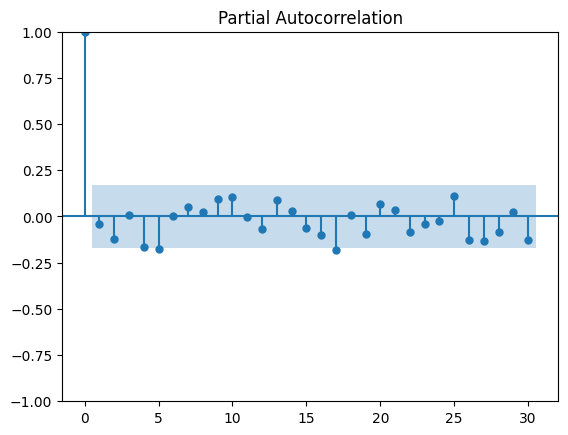

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF plots
plot_acf(data['Close_diff'].dropna(), lags=30)
plot_pacf(data['Close_diff'].dropna(), lags=30)
plt.show()


In [115]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(data['Close'], test_size=0.2, shuffle=False)


In [116]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model with p=3, d=1, q=3
model = ARIMA(train_data, order=(3, 1, 3))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  104
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -221.115
Date:                Fri, 08 Sep 2023   AIC                            456.230
Time:                        16:32:26   BIC                            474.673
Sample:                             0   HQIC                           463.700
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5231      0.081     -6.455      0.000      -0.682      -0.364
ar.L2          0.5794      0.057     10.207      0.000       0.468       0.691
ar.L3          0.9435      0.078     12.074      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

In [117]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_data, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(test_data, predictions, squared=False)

# Print the MSE, MAE, and RMSE
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)


MSE: 3.8797133574159828
MAE: 1.506228228776809
RMSE: 1.9696987986532313


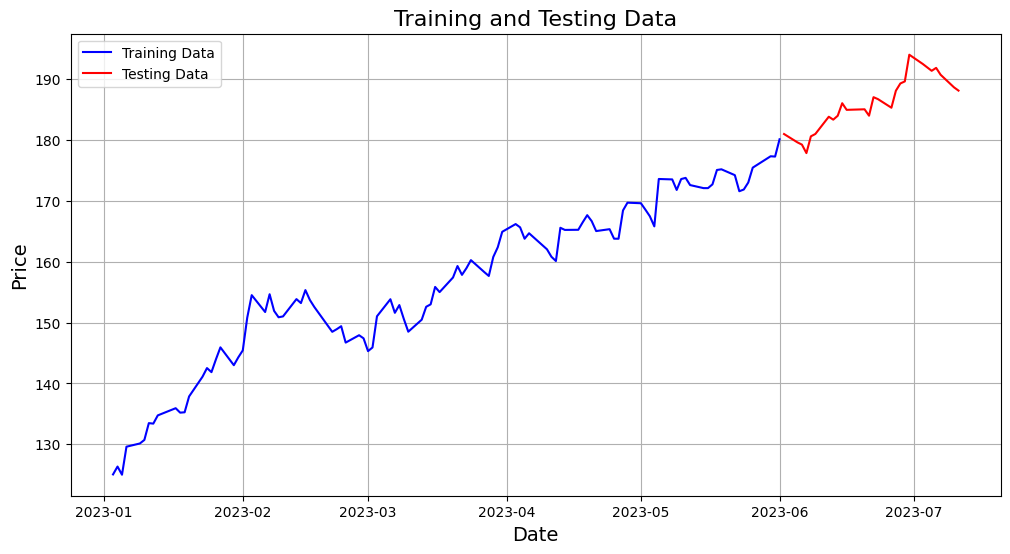

In [118]:
# Plot the training and testing data
plt.figure(figsize=(12, 6))

# Plot the training data (blue line)
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# Plot the testing data (red line)
plt.plot(test_data.index, test_data, label='Testing Data', color='red')

plt.title("Training and Testing Data", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [119]:
# Specify the number of periods to forecast into the future
forecast_periods = 30  

# Generate future predictions
forecast = model_fit.forecast(steps=forecast_periods)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed


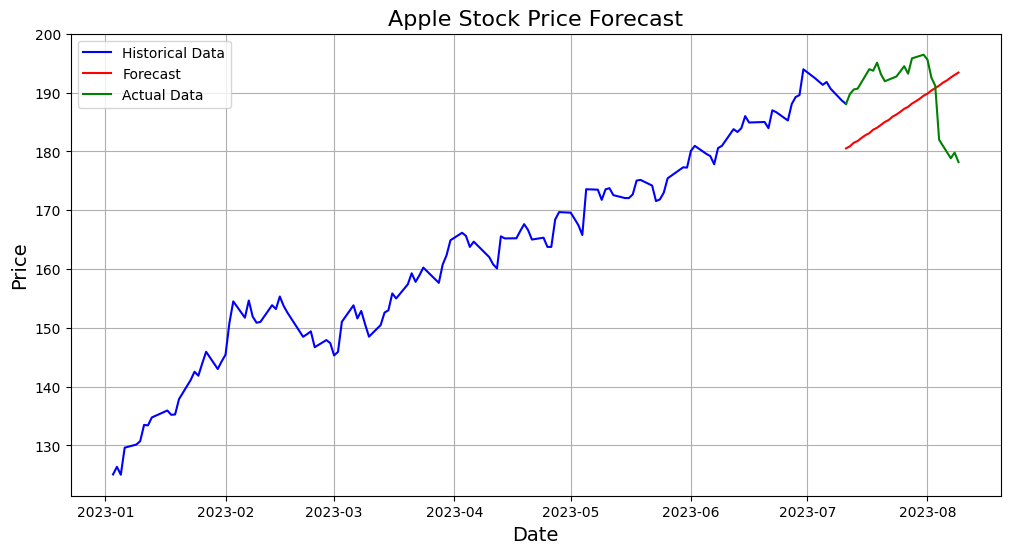

In [120]:
import pandas as pd

ticker = 'AAPL'
start_date_actual = '2023-07-11'
end_date_actual = '2023-08-10'  # 30 days from '2023-07-11'

# Fetch actual data
actual_data = yf.download(ticker, start=start_date_actual, end=end_date_actual)

# Create a date index for the forecasted data
forecast_index = pd.date_range(start=test_data.index[-1], periods=forecast_periods)

# Plot the historical data and forecasted data
plt.figure(figsize=(12, 6))

# Plot the historical data (blue line)
plt.plot(data['Close'].index, data['Close'], label='Historical Data', color='blue')

# Plot the forecasted data (red line)
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.plot(actual_data.index, actual_data['Close'], label='Actual Data', color='green')


plt.title("Apple Stock Price Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
